### Loading data

In [416]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
# import geopandas as gpd
import json

# Consistent theme
import plotly.io as pio
pio.templates.default = "plotly_white"

In [417]:
filename = "../data/cbioportal/cll_broad_2022_clinical_data.csv"

df = pd.read_csv(filename)
df.head()

,patientId,sampleId,studyId,ARRAY450K,CANCER_TYPE,CANCER_TYPE_DETAILED,CENTER,CLL_EPITYPE,DISEASE_TYPE,EC_DISCOVERY,...,FFS_STATUS,IGHV_IDENTITY_PERCENTAGE,IGHV_MUTATION_STATUS,OS_MONTHS,OS_STATUS,PRIOR_TREATMENT_CATEGORY,SAMPLE_COUNT,SEX,TREATMENT_AFTER_SAMPLING,TREATMENT_STATUS
0,P-CRC-0001,CRC-0001,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,147.19,1:DECEASED,Untreated,1,Female,Chemo + Ab,Pre-treatment
1,P-CRC-0002,CRC-0002,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,154.49,1:DECEASED,Untreated,1,Male,Chemo + Ab,Pre-treatment
2,P-CRC-0003,CRC-0003,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,51.25,1:DECEASED,Untreated,1,Female,Chemo + Ab,Pre-treatment
3,P-CRC-0004,CRC-0004,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,m-CLL,CLL,Yes,...,1:Failure,92.28,mutated,183.55,0:LIVING,Untreated,1,Male,Chemo + Ab,Pre-treatment
4,P-CRC-0005,CRC-0005,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,164.35,0:LIVING,Untreated,1,Male,Chemo + Ab,Pre-treatment


In [418]:
print(df.columns)

Index(['patientId', 'sampleId', 'studyId', 'ARRAY450K', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'CENTER', 'CLL_EPITYPE', 'DISEASE_TYPE',
       'EC_DISCOVERY', 'EC_EXTENSION', 'IGLV3_21_R110', 'M-CLL_WES',
       'MUTATION_COUNT', 'NORMAL_MEAN_COVERAGE', 'ONCOTREE_CODE',
       'RNA_SEQUENCING', 'RRBS', 'SEQUENCING_PLATFORM', 'SOMATIC_STATUS',
       'TMB_NONSYNONYMOUS', 'TUMOR_MEAN_COVERAGE', 'TUMOR_MOLECULAR_SUBTYPE',
       'TUMOR_SAMPLE_PLOIDY', 'TUMOR_SAMPLE_PURITY', 'U-CLL_WES', 'U1_STATUS',
       'AGE', 'AGE_SAMPLING', 'COHORT', 'DEATH_DAYS', 'EXPRESSION_CLUSTER',
       'FFS_MONTHS', 'FFS_STATUS', 'IGHV_IDENTITY_PERCENTAGE',
       'IGHV_MUTATION_STATUS', 'OS_MONTHS', 'OS_STATUS',
       'PRIOR_TREATMENT_CATEGORY', 'SAMPLE_COUNT', 'SEX',
       'TREATMENT_AFTER_SAMPLING', 'TREATMENT_STATUS'],
      dtype='object')


### Adding Data Origin and Source Information

In [419]:
originIdLabels = {
    1: {
        "org": "ICGC",
        "paper_reference": 2,
        "dataset_tag": "2015_1",
        "count": 506,
        "description": "CLL (n=452), MBL (n=54)",
        "origin": 'PUBLICATION',
        "year": "2015",
    },
    2: {
        "org": "NHLBI",
        "paper_reference": 3,
        "count": 22,
        "duplicates": 1,
        "origin": 'PUBLICATION',
        "year": "2019",
    },
    3: {
        "org": "DFCI",
        "paper_reference": 11,
        "count": 25,
        "origin": 'PUBLICATION',
        "year": "2015",
    },
    4: {
        "org": "UCSD",
        "paper_reference": 0,
        "count": 31,
        "duplicates": 5,
        "origin": 'PUBLICATION',
        "year": "2022",
    },
    5: {
        "org": "DFCI",
        "paper_reference": 1,
        'dataset_tag': "2015_2",
        "count": 154,
        "origin": 'PUBLICATION',
        "description": "coming from 2013 publication - DFCI_Cell_2013",
        "year": "2013",
    },
    6: {
        "org": "GCLLSG",
        "paper_reference": [1, 62],
        'dataset_tag': "2015_2",
        "count": 309,
        "origin": 'TRIAL',
        "description": "GCLLSG_CLL8 trial: comparison of fludarabine and cyclophosphamide (FC) to FC-rituximab (FCR) in previously untreated patients",
        "nctId": "NCT00281918",
        "year": "2013",
    },
    7: {
        "org": "GCLLSG",
        "paper_reference": 63,
        "count": 31,
        "origin": 'TRIAL',
        "description": "GCLLSG_CLL2O trial: treatment-naive TP53-mutated patients within phase 2 CLL20 trial who all received alemtuzumab",
        "year": "2014",
        "nctId": "CLL2O",
    },
    8: {
        "org": "NHLBI",
        "paper_reference": 10,
        "count": 51,
        "origin": 'TRIAL',
        "description": "phase 2 clinical trials of single-agent ibrutinib",
        "nctId": "NCT01500733",
        "year": "2014",
    },
    9: {
        "org": "MDACC",
        "paper_reference": [10, 12],
        "count": 25,
        "origin": 'TRIAL',
        "description": "phase 2 clinical trials of ibrutinib with rituximab ",
        "nctId": "NCT01520519",
        "year": "2019",
    }

}

In [420]:
# add new column called originId and we will create a function to populate it
def create_origin_id(row):
    # if patientId starts with P-SCLL-0001, then originId = 1
    if row["patientId"].startswith("P-SCLL-"):
        return 1
    # if patientId falls in between NHLBI-0056 to NHLBI-0096, inclusive, then originId = 2
    elif row["patientId"].startswith("P-NHLBI-") and int(row["patientId"][9:]) in range(56, 97):
        return 2
    # if patientId starts with P-JB-, then originId = 3
    elif row["patientId"].startswith("P-JB-"):
        return 3
    # if patientId starts with P-CRC- then originId = 4
    elif row["patientId"].startswith("P-CRC-"):
        return 4
    # if patientId starts with P-DFCI- then originId = 5
    elif row["patientId"].startswith("P-DFCI-"):
        return 5
    # if patientId falls in between P-GCLL-0001 to P-GCLL-0314, inclusive, then originId = 6
    elif row["patientId"].startswith("P-GCLL-") and int(row["patientId"][8:]) in range(1, 315):
        return 6
    # if patientId falls in between P-GCLL-0315 to P-GCLL-0345, inclusive, then originId = 7
    elif row["patientId"].startswith("P-GCLL-") and int(row["patientId"][8:]) in range(315, 346):
        return 7
    # if patientId falls in between P-NHLBI-0001 to P-NHLBI-0053, inclusive, then originId = 8
    elif row["patientId"].startswith("P-NHLBI-") and int(row["patientId"][9:]) in range(1, 54):
        return 8
    # if patientId falls in between P-MDAC-0001 to P-MDAC-0026, inclusive, then originId = 9
    elif row["patientId"].startswith("P-MDAC-") and int(row["patientId"][8:]) in range(1, 27):
        return 9
    else:
        return None 
        

In [421]:
# apply the function to create the new column
df["originId"] = df.apply(create_origin_id, axis=1)

# Confirm that value counts are as expected from the originIdLabels
for originId, label in originIdLabels.items():
    expected_count = label["count"]
    actual_count = df["originId"].value_counts().get(originId, 0)
    assert actual_count == expected_count, f"Expected {expected_count} for originId {originId}, but got {actual_count}"
print("All originId counts are as expected.")

All originId counts are as expected.


In [422]:
# add columns for year and originType and populate them
df["year"] = df["originId"].apply(lambda x: originIdLabels[x]["year"] if x in originIdLabels else None)
df["originType"] = df["originId"].apply(lambda x: originIdLabels[x]["origin"] if x in originIdLabels else None)


display(df['year'].value_counts().sort_index())
display(df['originType'].value_counts().sort_index())
print("Columns 'year' and 'originType' added successfully.")

year
2013    463
2014     82
2015    531
2019     47
2022     31
Name: count, dtype: int64

originType
PUBLICATION    738
TRIAL          416
Name: count, dtype: int64

Columns 'year' and 'originType' added successfully.


In [423]:
df['org'] = df["originId"].apply(lambda x: originIdLabels[x]["org"] if x in originIdLabels else None)

for index, row in df.iterrows():
    if pd.notnull(row['COHORT']):
        assert row['org'] == row['COHORT'], f"Mismatch at index {index}: org={row['org']}, COHORT={row['COHORT']}"
print("All org values match COHORT values where COHORT is not null.")

# if cohort is null, populate it with the org value
print(df['COHORT'].isnull().sum(), "rows have null COHORT values before filling.")
df['COHORT'] = df.apply(lambda row: row['org'] if pd.isnull(row['COHORT']) else row['COHORT'], axis=1)
print(df['COHORT'].isnull().sum(), "rows have null COHORT values after filling.")

# drop the org column
df.drop(columns=['org'], inplace=True)

All org values match COHORT values where COHORT is not null.
2 rows have null COHORT values before filling.
0 rows have null COHORT values after filling.


In [424]:
# for rows with trial, populate nctId
def get_nct_id(row):
    if row['originId'] in originIdLabels:
        return originIdLabels[row['originId']].get('nctId', None)
    return None

df['nctId'] = df.apply(get_nct_id, axis=1)
df['nctId'].value_counts().sort_index().to_frame().head(10)

,count
nctId,
CLL2O,31
NCT00281918,309
NCT01500733,51
NCT01520519,25


### Cleaning columns

In [425]:
column_definitions = {
    "patientId": "Unique patient identifier",
    "sampleId": "Unique sample identifier",
    'AGE': "Age at diagnosis in years",
    'AGE_SAMPLING': "Age at sampling in years",
    "SEX": "Male/Female",
    'COHORT': "Cohort: ICGC, DFCI, GCLLSG, NHLBI, UCSD, MDACC",
    'DEATH_DAYS': "Death (days) from the date of sampling",
    'FFS_MONTHS': "Failure free survival (months)",
    'FFS_STATUS': "Failure free status - 1:Failure, 0:FailureFree",
    "OS_MONTHS": "Overall survival (months) from the date of the sequenced sample",
    "OS_STATUS": "Overall survival status - 0:LIVING, 1:DECEASED",
    "PRIOR_TREATMENT_CATEGORY": "Prior treatment category: CheUntreatedmo, Chemo + Ab, Chemo + no Ab, etc.",
    "TREATMENT_STATUS": "Treatment status at sampling: Pre-treatment, Post-treatment",
    'TREATMENT_AFTER_SAMPLING': "Treatment after sampling: Chemo + Ab, Chemo + no Ab, etc.",

    "CLL_EPITYPE": "CLL epitype classification: n-CLL, m-CLL, i-CLL, unclassified",
    'DISEASE_TYPE': "Disease type: CLL, MBL",
    'MUTATION_COUNT': "Number of mutations in the sample",
    'U1_STATUS': "U1 mutation status can be either wild-type (WT) or mutant (MUT), depending on whether a specific mutation, often the g.3A>C mutation, is present in the U1 spliceosomal RNA",

    # "IGLV3_21_R110"
    # "TMB_NONSYNONYMOUS"
    # "TUMOR_MOLECULAR_SUBTYPE"
    # "IGHV_MUTATION_STATUS": "IGHV mutational status (mutated / unmutated, cutoff set at 98% identity to reference)"
    # "IGHV_IDENTITY_PERCENTAGE": "IGHV identity to reference"
    # "EXPRESSION_CLUSTER"
    # "SAMPLE_COUNT" # 2 for 12 entries, rest is 1

    "SOMATIC_STATUS": " Identifying mutations (variants) within a tumor sample that are not present in a matched normal (or non-cancerous) sample from the same individual",

    # Within whole-exome sequencing (WES) or whole-genome sequencing (WGS) data, the following columns are defined:
    # the below two are metrics to show how much depth the sequencing has been done and confidence in the data
    'NORMAL_MEAN_COVERAGE': "Mean read coverage of Normal sample",
    'TUMOR_MEAN_COVERAGE': "Mean read coverage of Tumor sample",
    "TUMOR_SAMPLE_PURITY": "Tumor sample purity (based on ABSOLUTE)",
    "TUMOR_SAMPLE_PLOIDY": "Tumor sample ploidy (based on ABSOLUTE)",

    'SEQUENCING_PLATFORM': "Sequencing platform used for the sample: WES, WGS or WES/WGS",
    "ARRAY450K": "If included in the 450K array methylation analysis: Yes or No",
    'RNA_SEQUENCING': "If included in RNA sequencing analysis: Yes or No",
    'RRBS': "If included in reduced representation bisulfite sequencing (RRBS) analysis: Yes or No",

    "EC_DISCOVERY": "If included in expression cluster discovery set: Yes or No",
    "EC_EXTENSION": "If included in expression cluster extension set: Yes or No",
    'M-CLL_WES': "If included in M-CLL WES genetic candidate driver discovery cohort: Yes or No",
    'U-CLL_WES': "If included in U-CLL WES genetic candidate driver discovery cohort: Yes or No",

}


In [426]:
cols_to_drop = [
    'studyId', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'CENTER', 'ONCOTREE_CODE', "SOMATIC_STATUS",
    'ARRAY450K', 'EC_DISCOVERY', 'EC_EXTENSION', 'M-CLL_WES', 'U-CLL_WES', 'RNA_SEQUENCING', 'RRBS',
    'NORMAL_MEAN_COVERAGE', 'TUMOR_MEAN_COVERAGE', 'SEQUENCING_PLATFORM', "TUMOR_SAMPLE_PURITY", "TUMOR_SAMPLE_PLOIDY",
]

# drop the columns that are not needed
df = df.drop(columns=cols_to_drop)
print(df.columns)

Index(['patientId', 'sampleId', 'CLL_EPITYPE', 'DISEASE_TYPE', 'IGLV3_21_R110',
       'MUTATION_COUNT', 'TMB_NONSYNONYMOUS', 'TUMOR_MOLECULAR_SUBTYPE',
       'U1_STATUS', 'AGE', 'AGE_SAMPLING', 'COHORT', 'DEATH_DAYS',
       'EXPRESSION_CLUSTER', 'FFS_MONTHS', 'FFS_STATUS',
       'IGHV_IDENTITY_PERCENTAGE', 'IGHV_MUTATION_STATUS', 'OS_MONTHS',
       'OS_STATUS', 'PRIOR_TREATMENT_CATEGORY', 'SAMPLE_COUNT', 'SEX',
       'TREATMENT_AFTER_SAMPLING', 'TREATMENT_STATUS', 'originId', 'year',
       'originType', 'nctId'],
      dtype='object')


In [427]:
# if CLL_EPITYPE is Chemo + no Ab or 0, change it to 'unclassified'
df['CLL_EPITYPE'] = df['CLL_EPITYPE'].replace({'Chemo + no Ab': 'unclassified', '0': 'unclassified'})
df['CLL_EPITYPE'] = df['CLL_EPITYPE'].fillna('unclassified')
df['CLL_EPITYPE'].value_counts()

CLL_EPITYPE
n-CLL           391
m-CLL           342
unclassified    280
i-CLL           141
Name: count, dtype: int64

### Plotting

In [428]:
# cohort_country_map = {
#     'ICGC': 'Spain',
#     'NHLBI': 'USA',
#     'DFCI': 'Massachusetts',
#     'UCSD': 'California',
#     'GCLLSG': 'Germany',
#     'MDACC': 'Texas'
# }

# df['Country'] = df['COHORT'].map(cohort_country_map)
# country_counts = df['Country'].value_counts().reset_index()
# country_counts.columns = ['Country', 'Count']

# fig = px.choropleth(country_counts, locations='Country', locationmode='state names',
#                     color='Count', title='Geographic Distribution of Cohorts',
#                     color_continuous_scale='Blues')
# fig.show()

In [429]:
from plotly.graph_objects import Sankey

sources = []
targets = []
values = []

# Start from all to originType
grouped = df.groupby('originType').size().reset_index(name='count')
for i, row in grouped.iterrows():
    sources.append('All')
    targets.append(row['originType'])
    values.append(row['count'])


# Trial/Publication → Cohort
grouped1 = df.groupby(['originType', 'COHORT']).size().reset_index(name='count')
for i, row in grouped1.iterrows():
    sources.append(row['originType'])
    targets.append(row['COHORT'])
    values.append(row['count'])

# Cohort → originId
grouped2 = df.groupby(['COHORT', 'originId']).size().reset_index(name='count')
for i, row in grouped2.iterrows():
    sources.append(row['COHORT'])
    targets.append(f"originId_{row['originId']}")
    values.append(row['count'])

# Map labels to indices
labels = list(set(sources + targets))
label_indices = {label: i for i, label in enumerate(labels)}

# add count annotations to all the labels (based on their counts)
for i, label in enumerate(labels):
    if label.startswith('originId_'):
        origin_id = int(label.split('_')[1])
        if origin_id in originIdLabels:
            count = originIdLabels[origin_id]['count']
            labels[i] += f" ({count})"
    elif label in ['TRIAL', 'PUBLICATION']:
        count = df[df['originType'] == label].shape[0]
        labels[i] += f" ({count})"
    elif label in ['ICGC', 'NHLBI', 'DFCI', 'UCSD', 'GCLLSG', 'MDACC']:
        count = df[df['COHORT'] == label].shape[0]
        labels[i] += f" ({count})"
    elif label == 'All':
        labels[i] += f" ({sum(values)})"

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels),
    link=dict(
        source=[label_indices[s] for s in sources],
        target=[label_indices[t] for t in targets],
        value=values
    ))])

fig.update_layout(title_text="Dataset Source Flow", font_size=10)
fig.show()


In [430]:
year_counts = df['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Patient_Count']

fig = px.bar(year_counts, x='Year', y='Patient_Count',
             title="Number of Patients Added Over Time")
fig.show()

In [431]:
df_sub = df.dropna(subset=['IGHV_MUTATION_STATUS'])
fig = px.histogram(df_sub, x='originId', color='IGHV_MUTATION_STATUS',
                   title='IGHV Mutation Status by Origin ID',
                   barmode='stack')
fig.show()

In [432]:
df_sub = df.dropna(subset=['CLL_EPITYPE'])
fig = px.histogram(df_sub, x='originId', color='IGHV_MUTATION_STATUS',
                   title='IGHV Mutation Status by Origin ID',
                   barmode='stack')
fig.show()

In [433]:
df_sub = df.dropna(subset=['CLL_EPITYPE'])
fig = px.histogram(df_sub, x='originId', color='CLL_EPITYPE',
                   title='CLL_EPITYPE by Origin ID',
                   barmode='stack')
fig.show()

In [434]:
df[df['originId'] == 7]['CLL_EPITYPE'].isnull().sum()

np.int64(0)

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_86925/254022526.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



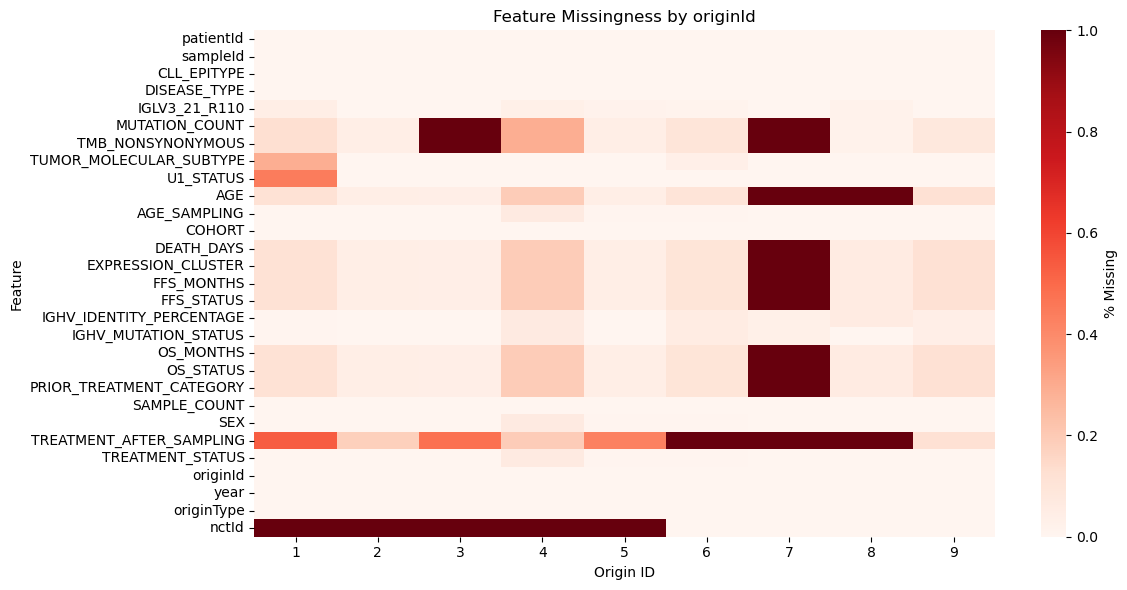

In [435]:
missing = df.groupby('originId').apply(lambda x: x.isna().mean()).T
plt.figure(figsize=(12, 6))
sns.heatmap(missing, cmap='Reds', cbar_kws={'label': '% Missing'})
plt.title("Feature Missingness by originId")
plt.ylabel("Feature")
plt.xlabel("Origin ID")
plt.tight_layout()
plt.show()

In [436]:
df_age = df.dropna(subset=['AGE', 'CLL_EPITYPE'])
fig = px.box(df_age, x='CLL_EPITYPE', y='AGE', color='CLL_EPITYPE',
             title='Age Distribution by CLL Epitype')
fig.show()

In [437]:
df_age = df.dropna(subset=['AGE', 'IGHV_MUTATION_STATUS'])
fig = px.box(df_age, x='IGHV_MUTATION_STATUS', y='AGE', color='IGHV_MUTATION_STATUS',
             title='Age Distribution by CLL Epitype')
fig.show()

In [438]:
groups = ['SEX', 'CLL_EPITYPE', 'TUMOR_MOLECULAR_SUBTYPE']
risk_matrix = pd.DataFrame(index=groups, columns=['Sample Count', 'Missing % (OS_STATUS)'])

for g in groups:
    subset = df.groupby(g)
    counts = subset.size()
    missing = subset['OS_STATUS'].apply(lambda x: x.isna().mean())
    risk_matrix.loc[g] = [counts.min(), round(missing.max() * 100, 1)]

display(risk_matrix)

,Sample Count,Missing % (OS_STATUS)
SEX,410,13.7
CLL_EPITYPE,141,50.4
TUMOR_MOLECULAR_SUBTYPE,476,14.5


In [439]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

features = ['MUTATION_COUNT', 'TMB_NONSYNONYMOUS', 'AGE']
df_umap = df.dropna(subset=features + ['IGHV_MUTATION_STATUS'])
X = StandardScaler().fit_transform(df_umap[features])

embedding = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(X)
df_umap['UMAP_1'], df_umap['UMAP_2'] = embedding[:, 0], embedding[:, 1]

fig = px.scatter(df_umap, x='UMAP_1', y='UMAP_2', color='IGHV_MUTATION_STATUS',
                 title='UMAP Projection by IGHV Mutation Status')
fig.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))

for epitype in df['CLL_EPITYPE'].dropna().unique():
    sub = df[df['CLL_EPITYPE'] == epitype]
    if sub['OS_MONTHS'].notna().sum() > 20:
        kmf.fit(sub['OS_MONTHS'], sub['OS_STATUS'], label=epitype)
        kmf.plot_survival_function()

plt.title('Survival by CLL Epitype')
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'lifelines'

### Extra

In [ ]:
df[df['CLL_EPITYPE'] == 'unclassified']['originId'].value_counts()

originId
5    55
3    24
1    24
2    20
6     4
8     4
4     2
9     2
Name: count, dtype: int64

In [ ]:
# FIND rows where TUMOR_MOLECULAR_SUBTYPE is M-CLL and IGHV_MUTATION_STATUS iS NOT mutated
df[(df['TUMOR_MOLECULAR_SUBTYPE'] == 'M-CLL') & (df['IGHV_MUTATION_STATUS'] == 'unmutated')][['patientId', 'sampleId', 'TUMOR_MOLECULAR_SUBTYPE', 'IGHV_MUTATION_STATUS']]

,patientId,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS
23,P-CRC-0020,DFCI-5053,M-CLL,unmutated
32,P-DFCI-5002,DFCI-5002,M-CLL,unmutated
38,P-DFCI-5018,DFCI-5018,M-CLL,unmutated
45,P-DFCI-5035,DFCI-5035,M-CLL,unmutated
51,P-DFCI-5045,DFCI-5045,M-CLL,unmutated
...,...,...,...,...
981,P-SCLL-0334,SCLL-0334,M-CLL,unmutated
988,P-SCLL-0341,SCLL-0341,M-CLL,unmutated
997,P-SCLL-0350,SCLL-0350,M-CLL,unmutated
1000,P-SCLL-0353,SCLL-0353,M-CLL,unmutated


In [ ]:
# FIND rows where TUMOR_MOLECULAR_SUBTYPE is M-CLL and IGHV_MUTATION_STATUS iS NOT mutated
df[(df['TUMOR_MOLECULAR_SUBTYPE'] == 'U-CLL') & (df['IGHV_MUTATION_STATUS'] == 'mutated')][['patientId', 'sampleId', 'TUMOR_MOLECULAR_SUBTYPE', 'IGHV_MUTATION_STATUS']]

,patientId,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS
7,P-CRC-0007,DFCI-5193,U-CLL,mutated
10,P-CRC-0009,JB-0010,U-CLL,mutated
26,P-CRC-0028,CRC-0028,U-CLL,mutated
42,P-DFCI-5027,DFCI-5027,U-CLL,mutated
44,P-DFCI-5034,DFCI-5034,U-CLL,mutated
...,...,...,...,...
983,P-SCLL-0336,SCLL-0336,U-CLL,mutated
991,P-SCLL-0344,SCLL-0344,U-CLL,mutated
992,P-SCLL-0345,SCLL-0345,U-CLL,mutated
1001,P-SCLL-0354,SCLL-0354,U-CLL,mutated


In [ ]:
#  there are 2 rows in df[df['patientId'] == 'P-CRC-0007'], find where they differ
def check_patient_differences(patientId):
    dupl = df[df['patientId'] == patientId]
    diff_columns = dupl.columns[dupl.nunique() > 1]
    # append ['IGHV_MUTATION_STATUS', 'TUMOR_MOLECULAR_SUBTYPE'] to diff_columns
    diff_columns = diff_columns.append(pd.Index(['IGHV_MUTATION_STATUS', 'TUMOR_MOLECULAR_SUBTYPE']))
    display(dupl[diff_columns])
    return df[df['patientId'] == patientId]

# print rows with duplicate patient IDs
duplicates = df[df.duplicated(subset=['patientId'], keep=False)]
for patientId in duplicates['patientId'].unique():
    print(f"Checking differences for patientId: {patientId}")
    check_patient_differences(patientId)

Checking differences for patientId: P-CRC-0007


,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
6,CRC-0007,M-CLL,mutated,M-CLL
7,DFCI-5193,U-CLL,mutated,U-CLL


Checking differences for patientId: P-CRC-0009


,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
9,CRC-0009,M-CLL,mutated,M-CLL
10,JB-0010,U-CLL,mutated,U-CLL


Checking differences for patientId: P-CRC-0011


,sampleId,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
12,CRC-0011,unmutated,U-CLL
13,DFCI-5170,unmutated,U-CLL


Checking differences for patientId: P-CRC-0020


,sampleId,TUMOR_MOLECULAR_SUBTYPE,U1_STATUS,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
22,CRC-0020,U-CLL,WT,unmutated,U-CLL
23,DFCI-5053,M-CLL,MUT,unmutated,M-CLL


Checking differences for patientId: P-CRC-0035


,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
29,CRC-0035,U-CLL,NaN,U-CLL
30,DFCI-5088,M-CLL,NaN,M-CLL


Checking differences for patientId: P-NHLBI-0073


,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
633,NHLBI-0052,U-CLL,mutated,U-CLL
634,NHLBI-0073,M-CLL,mutated,M-CLL
